In [22]:
import pandas as pd
import numpy as np
from sklearn import metrics
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

from skater.core.global_interpretation.rule_list import SBRL
%matplotlib inline

In [2]:
titanic_df = pd.read_csv("/home/ubuntu/pramit/Skater/examples/data/titanic/train.csv")
print(titanic_df.head())
titanic_df.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Quick data transformation and cleaning ...
titanic_df["Sex"] = titanic_df["Sex"].astype('category')
titanic_df["Sex_Encoded"] = titanic_df["Sex"].cat.codes
#titanic_df["PassengerId"] = titanic_df["PassengerId"].astype('int')

titanic_df["Embarked"] = titanic_df["Embarked"].astype('category')
titanic_df["Embarked_Encoded"] = titanic_df["Embarked"].cat.codes
print(titanic_df.head(5))
titanic_df_clean = titanic_df.drop(['Ticket','Cabin', 'Name', 'Sex', 'Embarked'], axis=1)
# # Remove NaN values
titanic_df_clean = titanic_df_clean.dropna() 
print(titanic_df_clean.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_Encoded  \
0      0         A/5 21171   7.2500   NaN        S            1   
1      0          PC 17599  71.2833   C85        C            0   
2      0  STON/O2. 3101282   7.9250   NaN        S            0   
3      0            113803  53.1000  C123        S  

In [4]:
y = titanic_df_clean['Survived']

In [5]:
data = titanic_df_clean.drop(['Survived'], axis=1)
data['label'] = y
print(data.head())
# Lets trying building an Interpretable Model
feature_labels = list(data.columns)
print(type(feature_labels[0]))
print(feature_labels)

   PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_Encoded  \
0            1       3  22.0      1      0   7.2500            1   
1            2       1  38.0      1      0  71.2833            0   
2            3       3  26.0      0      0   7.9250            0   
3            4       1  35.0      1      0  53.1000            0   
4            5       3  35.0      0      0   8.0500            1   

   Embarked_Encoded  label  
0                 2      0  
1                 0      1  
2                 2      1  
3                 2      1  
4                 2      0  
<class 'str'>
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_Encoded', 'Embarked_Encoded', 'label']


In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, y, test_size=0.20, random_state=0)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(571, 9)
(143, 9)
(571,)
(143,)


In [7]:
sbrl_inst = SBRL()
model = sbrl_inst.fit(Xtrain, ytrain)

Eclat


parameter specification:


 tidLists
 support
 minlen
 maxlen
            target
   ext


    FALSE
     0.1
      1
      8
 frequent itemsets
 FALSE



algorithmic control:


 sparse
 sort
 verbose


      7
   -2
    TRUE



Absolute minimum support count:
 
22
 



create itemset ... 

set transactions ...
[428 item(s),
 226 transaction(s)] done 
[0.00s].


sorting and recoding items ... 
[12 item(s)] 
done [0.00s].


creating bit matrix ... 
[12 row(s), 226 column(s)] 
done [0.00s].

writing  ... 
[96 set(s)] done 
[0.00s].

Creating S4 object  ... 
done 
[0.00s].

Eclat


parameter specification:


 tidLists
 support
 minlen
 maxlen
            target
   ext


    FALSE
     0.1
      1
      8
 frequent itemsets
 FALSE



algorithmic control:


 sparse
 sort
 verbose


      7
   -2
    TRUE



Absolute minimum support count:
 
34
 



create itemset ... 

set transactions ...
[567 item(s),
 345 transaction(s)] done 
[0.00s].


sorting and recoding items ... 
[10 item(s)

In [9]:
# Encoding rules: 'male=1; female=0'
sbrl_inst.print_model()

The rules list is : 

If      {Pclass=3,Sex_Encoded=0} (rule[68]) then positive probability = 0.43023256

else if {Sex_Encoded=0} (rule[83]) then positive probability = 0.95081967

else if {Pclass=2,Parch=0} (rule[44]) then positive probability = 0.07246377

else if {Pclass=3} (rule[80]) then positive probability = 0.16746411

else  (default rule)  then positive probability = 0.40000000



In [23]:
# Training a regular Tree bases ensemble learner using Random Forest
from sklearn.ensemble import RandomForestClassifier
y_train = ytrain
y_test = ytest
# droping the previously added 'label' column
x_train = Xtrain.drop(['label'], axis=1)
x_test = Xtest.drop(['label'], axis=1)

rf_model = RandomForestClassifier().fit(x_train, y_train)
results_test_rf = pd.DataFrame(rf_model.predict_proba(x_test))
print(results_test_rf.head(1))

     0    1
0  0.7  0.3


In [24]:
param_range = [1, 10, 20, 30, 40, 50, 60, 100, 200, 300, 400]

train_scores, test_scores = validation_curve(
    RandomForestClassifier(), x_train, ytrain, param_name="n_estimators", param_range=param_range,
    cv=4, scoring="accuracy", n_jobs=3)

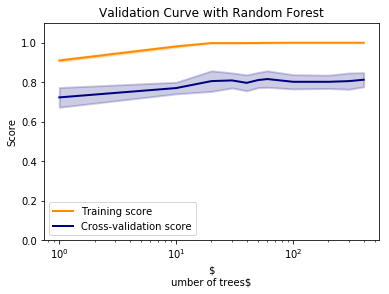

In [25]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel("$\number of trees$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [26]:
rf_model = RandomForestClassifier(n_estimators=20).fit(x_train, y_train)
results_test_rf = pd.DataFrame(rf_model.predict_proba(x_test))

In [27]:
# Evaluating the Random Forest vs BRL
results_test_sbrl = sbrl_inst.predict_prob(Xtest)
fpr_sbrl, tpr_sbrl, thresholds_sbrl = metrics.roc_curve(ytest ,results_test_sbrl[1], pos_label=1)
roc_auc_sbrl = metrics.auc(fpr_sbrl, tpr_sbrl)
print(roc_auc_sbrl)

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(ytest ,results_test_rf[1], pos_label=1)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
print(roc_auc_rf)

0.859671677215
0.864022943038


In [28]:
fpr_list = [fpr_rf, fpr_sbrl]
tpr_list = [tpr_rf, tpr_sbrl]
roc_auc_list = [roc_auc_rf, roc_auc_sbrl]
label_list = ['Random Forest', 'Decision Rules']

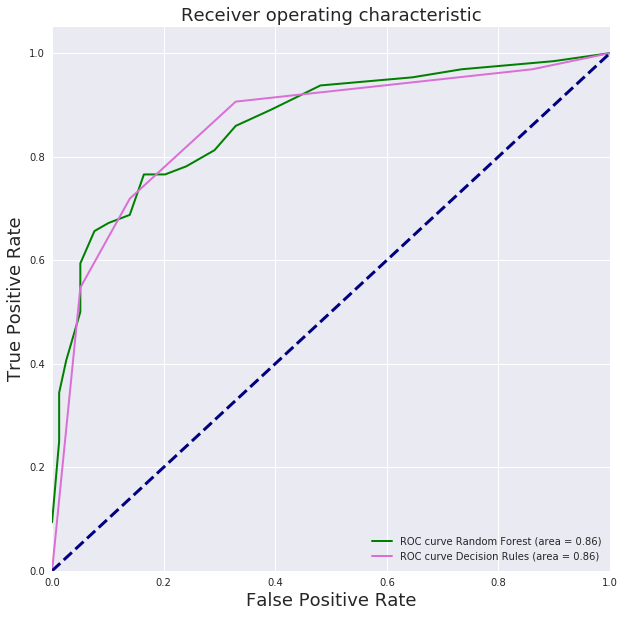

In [29]:
plt.style.use(['seaborn'])
plt.figure(figsize=(10,10))
plt.rc('font', size=12)
lw = 2
colors = ['green', 'orchid']
for i in range(len(fpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i],
         lw=lw, label='ROC curve {0} (area = {1:0.2f})'.format(label_list[i], roc_auc_list[i]), )
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right")